#### 4) Image Resolution. (30 points)
a. Reduce the resolution of 1_3.asc by a factor of 4 in both horizontal and vertical dimensions (e.g., if the original image is 400 by 400, then result shall be 100 by 100) to create a decimated image using two different methods:
* i. Keep one pixel out of every 4x4 pixel area. Display the resulting image Y1.
* ii. Replace every 4x4 pixel area in 1_3.asc by the average value of the pixel values in that region. Display the resulting image Y2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
img_filepath = '/home/ngtuetam/workspace/DIP_2022/assignment_1/data/1_3.asc'

In [3]:
def resolute_image_a1(image,n):
    """
    Reduce the resolution of image by a factor of n in both horizontal and vertical dimensions. 
    Keep one pixel out of every nxn pixel area.
    
    Args:
        image (np.array): input image as numpy array
        n (scalar) : factor of n
        
    Returns:
        resoluted_img (np.array): resoluted image
    """
    resoluted_img = image[::4, ::4]
    return resoluted_img
    

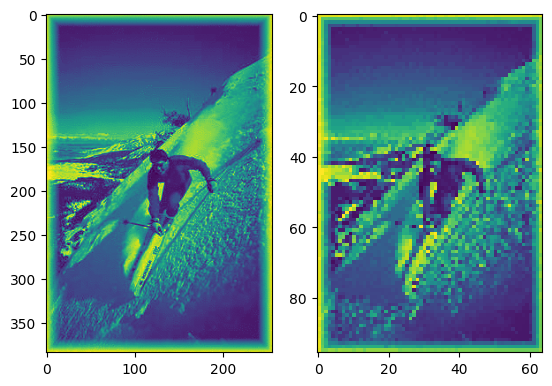

In [4]:
image = np.loadtxt(img_filepath)
n = 4
Y1 = resolute_image_a1(image, n)

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(Y1)

In [5]:
def resolute_image_a2(image, n):
    """
    Reduce the resolution of image by a factor of n in both horizontal and vertical dimensions. 
    Replace every nxn pixel area by the average value of the pixel values in that region.
    
    Args:
        image (np.array): input image as numpy array
        n (scalar) : factor of n
        
    Returns:
        resoluted_img (np.array): resoluted image
    """
    imgsize = image.shape
    x,y = imgsize[:2]
    resoluted_img = np.zeros((int(x/n),int(y/n)))
    for i in range(0,x,n):
        for j in range(0,y,n):
            cropped_img = image[i:i+n, j:j+n]
            mean_ = np.mean(cropped_img)
            row, col = int(i/n), int(j/n)
            resoluted_img[row][col] = mean_
            
    return resoluted_img

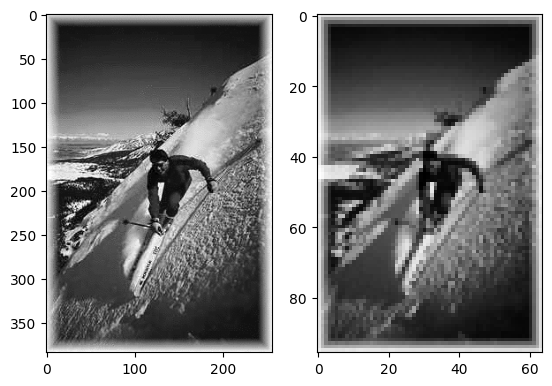

In [6]:
image = np.loadtxt(img_filepath)
n = 4
Y2 = resolute_image_a2(image,n)

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Y2, cmap='gray')

In [8]:
np.savetxt('y1_result.asc',Y1)

In [9]:
np.savetxt('y2_result.asc',Y2)


b. Enlarge Image Y1 by a factor of 4 in both horizontal and vertical dimensions (e.g., from 100 by 100 to 400 by 400) using:
* i. Pixel repeating. Since each pixel is blown up to a 4x4 block, the image looks
"blocky".


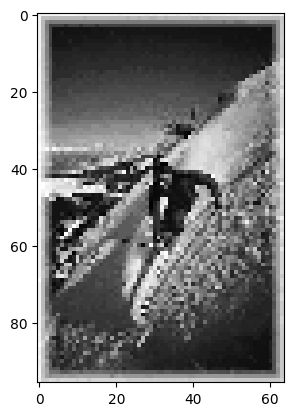

In [7]:
load_asc_img = lambda img_fp: np.loadtxt(img_fp)
image = load_asc_img('/home/ngtuetam/workspace/DIP_2022/assignment_1/notebook/y1_result.asc')
plt.imshow(image, cmap='gray')

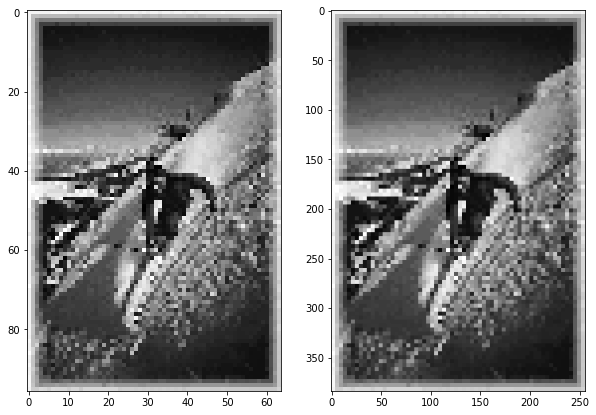

In [3]:
def enlarge_image_b1(image, n):
    """
    Enlarge Image by a factor of n in both horizontal and vertical dimensions using Pixel repeating.
    
    Args:
        image (np.array) : input image as numpy array
        n (scalar) : scale factor
        
    Returns:
        enlarged_img (np.array): enlarged image
        
    Raises:
        ValueError: if not 2-D image
    """
    if len(image.shape) != 2:
        raise ValueError('Input image must be gray scale (2-D matrix)!')
    
    h, w = image.shape
    enlarged_img = np.zeros(shape=(h*n, w*n), dtype=image.dtype)
    
    for i in range(h*n):
        for j in range(w*n):
            enlarged_img[i,j] = image[int(i/n),int(j/n)]
            
    return enlarged_img
    
load_asc_img = lambda img_fp: np.loadtxt(img_fp)
image = load_asc_img('/home/ngtuetam/workspace/DIP_2022/assignment_1/notebook/y1_result.asc')
n = 4
enlarged_img = enlarge_image_b1(image,n)

plt.rcParams['figure.figsize'] = [10, 15]
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(enlarged_img, cmap='gray')

In [4]:
np.savetxt('b1_result.asc',enlarged_img)

* ii. Bilinear interpolation (do not use interp2). As illustrated in Figure I, denote
the values of Point 1 and Point 3 as P 1 and P 3 respectively.